### Descriptive EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 16)

In [ ]:
# read data
df = pd.read_csv('/datasets/usc-drive/DSO 510 - Food Deserts/food_health_merged_2010_2014.csv')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# sample data
df.sample(5)

,Unnamed: 0,fips,state_x,county_x,indicator,value,year,state_y,county_y,mortality,lower_95,upper_95,disease
531331,531331,48067,Texas,Cass County,LACCESS_SNAP,161.795084,2014,NaN,NaN,7.09,4.71,10.01,Atrial fibrillation & flutter
1061509,1061509,31185,NaN,NaN,PCT_LACCESS_LOWI,6.642627,2010,NaN,NaN,4.53,3.64,5.57,Cardiomyopathy & myocarditis
752115,752115,13077,NaN,NaN,LACCESS_POP,32287.390645,2010,Georgia,Coweta County,259.92,246.63,272.47,Cardiovascular diseases
395467,395467,37025,North Carolina,Cabarrus County,LACCESS_HHNV,1335.647726,2014,NaN,NaN,9.51,8.51,10.58,Cardiomyopathy & myocarditis
281258,281258,27079,Minnesota,Le Sueur County,FMRKTPTH,0.036098,2014,NaN,NaN,38.02,35.46,41.04,Cerebrovascular disease


In [ ]:
# descriptive stats
df.describe()

,Unnamed: 0,fips,value,year,mortality,lower_95,upper_95
count,1.387932e+06,1.387932e+06,1.385345e+06,1.387932e+06,1.387932e+06,1.387932e+06,1.387932e+06
mean,6.939655e+05,3.038740e+04,8.881077e+03,2.011882e+03,4.695434e+01,4.299112e+01,5.120644e+01
std,4.006616e+05,1.515433e+04,8.227610e+04,1.996538e+00,8.293913e+01,7.735655e+01,8.869774e+01
min,0.000000e+00,1.001000e+03,0.000000e+00,2.010000e+03,7.900000e-01,4.000000e-01,9.800000e-01
25%,3.469828e+05,1.817700e+04,8.854463e-01,2.010000e+03,4.090000e+00,3.060000e+00,5.330000e+00
50%,6.939655e+05,2.917600e+04,1.090000e+01,2.010000e+03,9.930000e+00,8.170000e+00,1.229000e+01
75%,1.040948e+06,4.508100e+04,2.023116e+02,2.014000e+03,3.970000e+01,3.674000e+01,4.282000e+01
max,1.387931e+06,5.604500e+04,1.004757e+07,2.014000e+03,5.452300e+02,5.092700e+02,6.103800e+02


In [ ]:
# focus on percentage access to stores and cardiovascular diseases
basic = df.loc[(df['indicator']=='PCT_LACCESS_POP')&(df['disease']=='Cardiovascular diseases'),['fips','value','year','mortality']]
basic.head()

,fips,value,year,mortality
156,1001,32.062255,2014,316.36
364,1003,16.767489,2014,272.04
572,1005,22.105560,2014,255.09
780,1007,4.230324,2014,378.09
988,1009,6.497380,2014,307.90


In [ ]:
# correlation matrix
basic.corr()

,fips,value,year,mortality
fips,1.000000e+00,0.045394,-4.148656e-13,-0.038660
value,4.539387e-02,1.000000,-1.215856e-02,-0.224902
year,-4.148656e-13,-0.012159,1.000000e+00,-0.005323
mortality,-3.865959e-02,-0.224902,-5.323252e-03,1.000000


In [ ]:
# correlation matrix for 2010
basic.loc[basic['year']==2010].corr()

,fips,value,year,mortality
fips,1.000000,0.043315,NaN,-0.038985
value,0.043315,1.000000,NaN,-0.254060
year,NaN,NaN,NaN,NaN
mortality,-0.038985,-0.254060,NaN,1.000000


In [ ]:
# looking at various diseases
# Cerebrovascular disease
df_cbd=df.loc[df['disease']=='Cerebrovascular disease', ['fips', 'value', 'mortality']]
df_cbd.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.047215
value,-0.014543,1.000000,-0.038881
mortality,-0.047215,-0.038881,1.000000


In [ ]:
# Ischemic heart disease
df_ihd=df.loc[df['disease']=='Ischemic heart disease', ['fips', 'value', 'mortality']]
df_ihd.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.009264
value,-0.014543,1.000000,-0.038122
mortality,-0.009264,-0.038122,1.000000


In [ ]:
# Ischemic stroke
df_is=df.loc[df['disease']=='Ischemic stroke', ['fips', 'value', 'mortality']]
df_is.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.008850
value,-0.014543,1.000000,-0.039046
mortality,-0.008850,-0.039046,1.000000


In [ ]:
# Hemorrhagic stroke
df_hs=df.loc[df['disease']=='Hemorrhagic stroke', ['fips', 'value', 'mortality']]
df_hs.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.115047
value,-0.014543,1.000000,-0.030512
mortality,-0.115047,-0.030512,1.000000


In [ ]:
# Rheumatic heart disease
df_rhd=df.loc[df['disease']=='Rheumatic heart disease', ['fips', 'value', 'mortality']]
df_rhd.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.258190
value,-0.014543,1.000000,-0.063809
mortality,-0.258190,-0.063809,1.000000


In [ ]:
# Cardiomyopathy & myocarditis
df_cm=df.loc[df['disease']=='Cardiomyopathy & myocarditis', ['fips', 'value', 'mortality']]
df_cm.corr()

,fips,value,mortality
fips,1.000000,-0.014543,-0.118361
value,-0.014543,1.000000,0.014245
mortality,-0.118361,0.014245,1.000000


In [ ]:
# mortality cardiovascular diseases 2014
# % pop low access to stores 2014

twentyfourteen = df.loc[(df['indicator']=='PCT_LACCESS_POP')&(df['disease']=='Cardiovascular diseases')&(df['year']==2014),['fips','value','year','mortality']]
twentyfourteen

,fips,value,year,mortality
156,1001,32.062255,2014,316.36
364,1003,16.767489,2014,272.04
572,1005,22.105560,2014,255.09
780,1007,4.230324,2014,378.09
988,1009,6.497380,2014,307.90
...,...,...,...,...
652236,56037,43.224074,2014,262.99
652444,56039,29.174370,2014,144.71
652652,56041,22.189685,2014,266.75
652860,56043,10.915407,2014,227.19


In [ ]:
# focus on 2010 bc of more detailed decennial census data
final_df = df.loc[(df['indicator']=='PCT_LACCESS_POP')&(df['disease']=='Cardiovascular diseases')&(df['year']==2010),['fips','value','year','mortality', 'state_y']]


In [ ]:
final_df[final_df.value>=100]

,fips,value,year,mortality,state_y
669994,2068,100.000001,2010,230.66,Alaska
717262,8061,100.000000,2010,223.01,Colorado
785590,16033,100.000001,2010,258.27,Idaho
869362,20075,100.000000,2010,264.61,Kansas
870064,20081,100.000000,2010,252.52,Kansas
872404,20101,100.000000,2010,274.93,Kansas
1031056,30037,100.000000,2010,188.94,Montana
1034800,30069,100.000000,2010,202.72,Montana
1035970,30079,100.000000,2010,214.50,Montana
1040416,31005,100.000001,2010,216.57,Nebraska


### Visual EDA

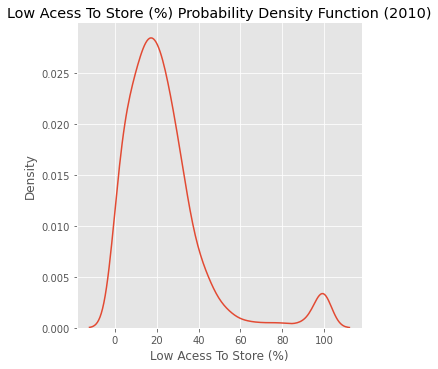

In [ ]:
sns.displot(data=final_df, x="value", kind="kde")
plt.xlabel("Low Acess To Store (%)")
plt.title("Low Acess To Store (%) Probability Density Function (2010)")
plt.show()

In [ ]:
# descriptive stats
final_df.value.describe().reset_index()

,index,value
0,count,3140.000000
1,mean,23.542735
2,std,20.239065
3,min,0.000000
4,25%,10.851679
5,50%,19.682744
6,75%,29.578214
7,max,100.000001


In [ ]:
# investigate 100% counties
state_counts = final_df[final_df.value>=100].state_y.value_counts().reset_index()
state_counts.columns = ["State", "Count"]
state_counts

,State,Count
0,Nebraska,7
1,Texas,6
2,South Dakota,3
3,Montana,3
4,Kansas,3
5,New Mexico,2
6,Utah,1
7,Virginia,1
8,Colorado,1
9,Nevada,1


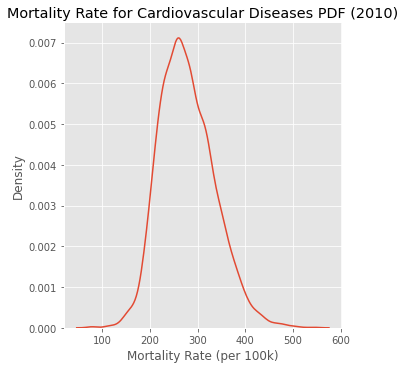

In [ ]:
sns.displot(data=final_df, x="mortality", kind="kde")
plt.title("Mortality Rate for Cardiovascular Diseases PDF (2010)")
plt.xlabel("Mortality Rate (per 100k)")
plt.show()

In [ ]:
# descriptive stats
final_df.mortality.describe().reset_index()

,index,mortality
0,count,3140.000000
1,mean,278.416519
2,std,56.241369
3,min,79.290000
4,25%,237.400000
5,50%,273.175000
6,75%,314.730000
7,max,539.930000


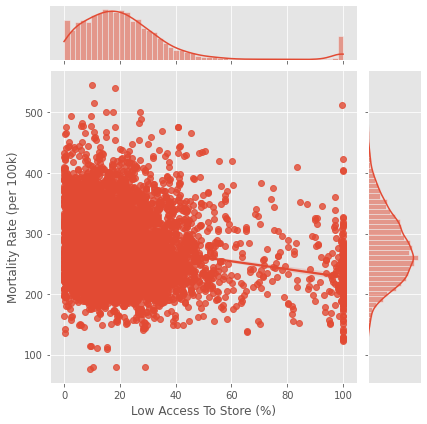

In [ ]:
j = sns.jointplot(data=final_df, x="value", y="mortality", kind="reg")
j.set_axis_labels('Low Access To Store (%)', 'Mortality Rate (per 100k)', fontsize=12)
plt.show()

In [ ]:
# save data
final_df.to_csv("modeling_data.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a805a7fe-fe3d-44c2-a936-f271a2a4c12f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>